<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/MI/BSc_MI_labor_2_CSP_hallgatoi_v2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

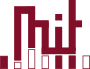 Mesterséges Intelligencia és Rendszertervezés Tanszék, ©2024. BME-MIT, Révy Gábor, Dr. Hullám Gábor  
# **VIMIAC16 - Mesterséges Intelligencia**
## 2024. Őszi félév
## **2. Laborgyakorlat**

# Kényszerkielégítési problémák

A kényszerkielégítési problémák (constraint satisfaction problem, CSP) az alábbi $\langle X, D, C \rangle $ hármassal definiálhatóak:
- $X = {X_1, \ldots, X_n}$ a változók halmaza
- $D = {D_1, \ldots, D_n}$ ezen változók lehetséges értékeinek nem üres tartománya (domain)
- $C = {C_1, \ldots, C_m}$ a kényszerek (constraint) halmaza

Célunk az $X_i$ változókhoz egy olyan hozzárendelést találni a $D_i$ tartományokból, amely megfelel a $C_i$ kényszereknek.

A CSP-kről részletes leírás és példa [itt](http://project.mit.bme.hu/mi_almanach/books/aima/ch05s01) található.

A labor során az [OR-TOOLS](https://developers.google.com/optimization) constraint programming könyvtárát fogjuk használni. Ezt az alábbi kódblokk futtatásával lehet telepíteni.

In [1]:
# @title Telepítés, letöltés
print('0/2 INSTALL STARTED')
!pip install ortools &> /dev/null
print('1/2 INSTALL DONE')
!wget -q -O helpers.zip https://gist.github.com/revygabor/9a84a459fd26d46cbbc656ca9b0e17b0/archive/d500e6e4f4b5efdabf809a38ebdce4e404aa6973.zip
!unzip -qj helpers.zip
print('2/2 DOWNLOAD DONE')

0/2 INSTALL STARTED
1/2 INSTALL DONE
2/2 DOWNLOAD DONE


A feladatok megoldásakor a változókat, azok domainjét és a kényszereket kell definiálni. A változók definiálásakor már azok domainjét is meghatározzuk.

A megoldáshoz szükséges példa kódrészletek:

- a könyvtár importálása
<br/> ```from ortools.sat.python import cp_model```

- a CSP problémát megoldó modell létrehozása
<br/> ```model = cp_model.CpModel()```

- $x$ nevű, 1 és 10 közötti egész értéket felvevő változó definiálása
<br/> ```x = model.NewIntVar(1, 10, "x")```

- korábban definiált ```x, y``` változókra vonatkozó kényszer definiálása
<br/> ```model.Add(3 * x + 5 * y <= 48)```
<br/> "nem egyenlő" kényszerre a ```!=``` operátor használható
<br/> több változó különbözőségi kényszerét egy listával adhatjuk a modellhez
<br/> ```model.AddAllDifferent([x, y, z])```

- ha van célfüggvény - pl. maximalizálás - , akkor azt is a változók definiálása után lehet megfogalmazni (a labor során nem lesz célfüggvény)
<br/> ```model.Maximize(3 * x + 2 * y)```

- ezután következik a megoldás keresése
<br/> ```solver = cp_model.CpSolver()```
<br/> ```status = solver.Solve(model)```

- a futás eredménye a következőképpen kérhető le:
  - a ```status``` változó egy "[enum](https://developers.google.com/optimization/cp/cp_solver#cp-sat_return_values)", szövegesen a ```solver.StatusName(status)``` kóddal kapjuk meg az állapotot
  - alapesetben a program ez első megoldást adja vissza
  <br/> ```solution_x = solver.Value(x)```
  <br/> ha több megoldást is szeretnénk megkapni, akkor callback függvényt kell írnunk (a laboron ezzel nem kell foglalkozni)


A kódot a __TODO__-val megjelölt helyeken kell csak kiegészíteni.



## Kriptoaritmetika

Az első feladat egy kriptoaritmetika feladvány megoldása.

\begin{array}{}
  & S & E & N & D \\
+ & M & O & R & E \\ \hline
M & O & N & E & Y \\
\end{array}


Itt a különböző betűk különböző, az egyformák pedig azonos számjegyet takarnak. A változók definiálásakor érdemes odafigyelni a szavak kezdőbetűinek domainjére.

In [2]:
%reset -f

from ortools.sat.python import cp_model

"""Solve the SEND+MORE==MONEY cryptarithm."""
"""
  SEND
+ MORE
------
 MONEY
"""
# Create CP model
model = cp_model.CpModel()

base = 10

# Create variables and define their intervals.
# Mind the first letters of the words!
s = model.NewIntVar(1, base - 1, 's') # cannot be 0 because it's the first digit
e = model.NewIntVar(0, base - 1, 'e')
n = model.NewIntVar(0, base - 1, 'n')
d = model.NewIntVar(0, base - 1, 'd')
m = model.NewIntVar(1, base - 1, 'm') # cannot be 0 because it's the first digit
o = model.NewIntVar(0, base - 1, 'o')
r = model.NewIntVar(0, base - 1, 'r')
y = model.NewIntVar(0, base - 1, 'y')

# We need to group variables in a list to use the constraint AllDifferent.
letters = [s, e, n, d, m, o, r, y]

# Define constraints.
# 1) All letters have a different value.
model.AddAllDifferent(letters)

# 2) SEND + MORE = MONEY
model.Add(
    s * base**3 + e * base**2 + n * base + d +
    m * base**3 + o * base**2 + r * base + e ==
    m * base**4 + o * base**3 + n * base**2 + e * base + y)

# Create a solver and solves the model.
solver = cp_model.CpSolver()
# Enumerate all solutions.
solver.parameters.enumerate_all_solutions = True
# Solve.
status = solver.Solve(model)

# Result.
print(f"status: {solver.StatusName(status)}")
print(f"assignment:")
for l in letters:
  print(f'\t{l}: {solver.Value(l)}')
print(f"{''.join([str(solver.Value(l)) for l in [s, e, n, d]])} + "
f"{''.join([str(solver.Value(l)) for l in [m, o, r, e]])} =? "
f"{''.join([str(solver.Value(l)) for l in [m, o, n, e, y]])}")

status: OPTIMAL
assignment:
	s: 9
	e: 5
	n: 6
	d: 7
	m: 1
	o: 0
	r: 8
	y: 2
9567 + 1085 =? 10652


A feladatnak 1 db megoldása van a következő hozzárendeléssel:

| betű | érték |
| ---- | ----- |
| S | 9 |
| E | 5 |
| N | 6 |
| D | 7 |
| M | 1 |
| O | 0 |
| R | 8 |
| Y | 2 |

## Térképszínezés

A [négyszín-tétel](https://hu.wikipedia.org/wiki/N%C3%A9gysz%C3%ADn-t%C3%A9tel) óta tudjuk. hogy minden síkbarajzolható gráf 4 színnel színezhető. Célunk egy kontinensen az országok kiszínezése úgy, hogy szomszédos országok nem lehetnek azonos színűek. Ennek kényszergráfja síkbarajzolható, tehát elvileg a feladat megoldható.

Ehhez először töltsük le a világtérképet, majd töltsünk be egy kontinenst, pl. Afrikát.

In [3]:
%reset -f

import geopandas as gpd
import matplotlib.pyplot as plt
from map_coloring_helper import get_bordering_countries, plot_colored_map

# Load world map from file and select a continent
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
print(f"continents: {', '.join(world['CONTINENT'].unique())}")
world[['CONTINENT', 'SOVEREIGNT']]

continents: Oceania, Africa, North America, Asia, South America, Europe, Seven seas (open ocean), Antarctica


,CONTINENT,SOVEREIGNT
0,Oceania,Fiji
1,Africa,United Republic of Tanzania
2,Africa,Western Sahara
3,North America,Canada
4,North America,United States of America
...,...,...
172,Europe,Republic of Serbia
173,Europe,Montenegro
174,Europe,Kosovo
175,North America,Trinidad and Tobago


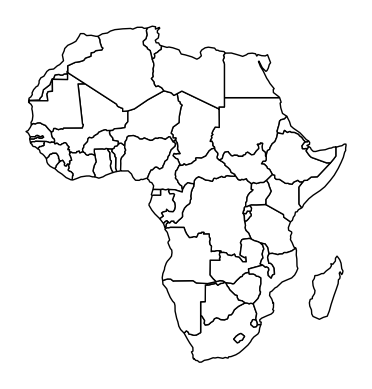

In [4]:
continent_name = 'Africa'
continent = world[world['CONTINENT'] == continent_name].copy().reset_index(drop=True)

# Plot continent
continent.plot(color='white', edgecolor='black')
plt.axis('off');

A színeket jelöljék egész számok, és így fogalmazzuk meg a kényszereket is.
A ```bordering_country_index_pairs``` változó a kontinensen található szomszédos országok indexpárjait tartalmazza.

Status: OPTIMAL


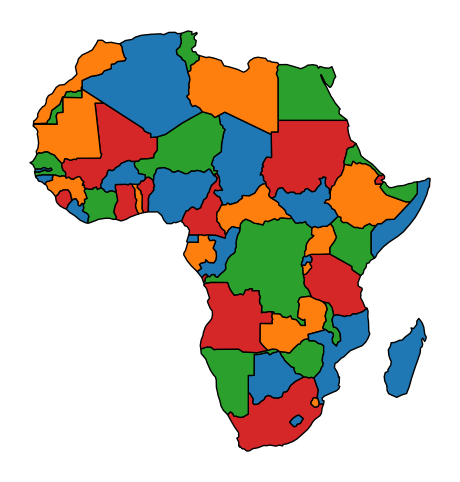

In [6]:
from ortools.sat.python import cp_model

# Define the constraints for the map coloring problem
def map_coloring_csp(map_):
    model = cp_model.CpModel()
    # set number of colors
    num_colors = 4
    num_countries = len(map_)

    # Create the variables:
    # There are `num_countries` number of variables, each encoding the color (integer) of a country.
    country_colors = [model.NewIntVar(0, num_colors - 1, f"{i}") for i in range(num_countries)]

    # Calculate index pairs of bordering countries (returns list of tuples)
    bordering_country_index_pairs = get_bordering_countries(map_)

    # Define constraints
    # 1) Bordering countries cannot have the same color
    for c1, c2 in bordering_country_index_pairs:
      model.Add(country_colors[c1] != country_colors[c2])

    # Use ortools to solve the CSP problem
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    print(f'Status: {solver.StatusName(status)}')
    if status == cp_model.OPTIMAL:
        coloring = [solver.Value(color) for color in country_colors]
        return coloring
    else:
        print("No solution found.")
        return None

coloring = map_coloring_csp(continent)
if coloring:
    plot_colored_map(continent, coloring)

## N királynő probléma

A feladat nyolckirálynő probléma általánosítása: az $n \times n$-es sakktáblán $n$ db királynőt kell elhelyezni úgy, hogy azok egymást ne tudják ütni. Tehát nem helyezkedhet el 2 királynő adott sorban, oszlopban vagy átlón. Mivel minden oszlopban pontosan egy királynő helyezkedik el, ezért az oszlopindexük alapján azonosítjuk őket, a változók pedig a sorindexet fogják tartalmazni majd. Célunk az összes megoldás megtalálása.

In [9]:
%reset -f

from ortools.sat.python import cp_model
from n_queens_helper import NQueenSolutionPrinter

def solve_n_queens(board_size):
    # Create solver
    model = cp_model.CpModel()

    # Create the variables:
    # There are `board_size` number of variables, one for a queen in each column
    # of the board. The value of each variable is the row that the queen is in.
    queens = [model.NewIntVar(0, board_size - 1, f"{i}") for i in range(board_size)]

    # Create constraints
    # 1) All rows must be different.
    model.AddAllDifferent(queens)

    # 2) No two queens can be on the same diagonal.
    for i in range(board_size):
      for j in range(i + 1, board_size):
        # queens[i] = i. oszlop, i = i. sor
        model.Add(queens[j] - queens[i] != j - i) # átló, ahol mindkettő (sor és oszlop is) nő vagy mindkettő csökken
        model.Add(queens[j] - queens[i] != i - j) # átló, ahol az egyik nő, a másik csökken


    # Solve the model.
    solver = cp_model.CpSolver()
    solution_printer = NQueenSolutionPrinter(queens)
    solver.parameters.enumerate_all_solutions = True
    solver.Solve(model, solution_printer)

    # Statistics.
    print("\nStatistics")
    print(f"  conflicts      : {solver.NumConflicts()}")
    print(f"  branches       : {solver.NumBranches()}")
    print(f"  wall time      : {solver.WallTime()} s")
    print(f"  solutions found: {solution_printer.solution_count()}")

chess_board_size = 8
solve_n_queens(chess_board_size)

Solution 0, time = 0.014843940734863281 s
□ □ □ ■ □ □ □ □ 
□ □ □ □ □ □ ■ □ 
□ □ □ □ ■ □ □ □ 
□ ■ □ □ □ □ □ □ 
□ □ □ □ □ ■ □ □ 
■ □ □ □ □ □ □ □ 
□ □ ■ □ □ □ □ □ 
□ □ □ □ □ □ □ ■ 

Solution 1, time = 0.024901866912841797 s
□ □ □ ■ □ □ □ □ 
□ ■ □ □ □ □ □ □ 
□ □ □ □ ■ □ □ □ 
□ □ □ □ □ □ □ ■ 
□ □ □ □ □ ■ □ □ 
■ □ □ □ □ □ □ □ 
□ □ ■ □ □ □ □ □ 
□ □ □ □ □ □ ■ □ 

Solution 2, time = 0.055982112884521484 s
□ □ □ □ □ □ □ ■ 
□ ■ □ □ □ □ □ □ 
□ □ □ □ ■ □ □ □ 
□ □ ■ □ □ □ □ □ 
■ □ □ □ □ □ □ □ 
□ □ □ □ □ □ ■ □ 
□ □ □ ■ □ □ □ □ 
□ □ □ □ □ ■ □ □ 

Solution 3, time = 0.09843158721923828 s
□ □ □ □ □ □ □ ■ 
□ ■ □ □ □ □ □ □ 
□ □ □ ■ □ □ □ □ 
■ □ □ □ □ □ □ □ 
□ □ □ □ □ □ ■ □ 
□ □ □ □ ■ □ □ □ 
□ □ ■ □ □ □ □ □ 
□ □ □ □ □ ■ □ □ 

Solution 4, time = 0.12584972381591797 s
□ □ □ □ □ □ ■ □ 
□ ■ □ □ □ □ □ □ 
□ □ □ ■ □ □ □ □ 
■ □ □ □ □ □ □ □ 
□ □ □ □ □ □ □ ■ 
□ □ □ □ ■ □ □ □ 
□ □ ■ □ □ □ □ □ 
□ □ □ □ □ ■ □ □ 

Solution 5, time = 0.13467907905578613 s
□ □ □ □ ■ □ □ □ 
□ □ □ □ □ □ □ ■ 
□ □ □ ■ □ □ □ □ 
■ □ □ □ □ □ □ □

# **Feladatbeadás**

**Ebben a feladatban a cél egy sudoku megoldó elkészítése.**

##Feladatleírás
A sudoku lényege röviden:
- Adott egy $9 \times 9$-es táblázat, benne 9 db $3 \times 3$-as résztáblázat.
- A cél, hogy a táblázatot kitöltsük az 1, 2, ..., 8, 9 számokkal úgy, hogy..
 - minden sorban
 - minden oszlopban
 - minden résztáblázatban
 - az $1...9$ számok mindegyike pontosan egyszer forduljon elő.
- A táblázat részben előre ki van töltve számokkal.

##Specifikáció
A moodle felületre egy `sudoku_solver.py` nevű python fájlt kell feltölteni. Ennek implementálnia kell egy
`solve_sudoku` nevű függvényt, ami átveszi az előre kitöltött táblázatot és visszaad egy megoldást azonos
formátumban.  
**A táblázat formátuma:** listák listája, ahol az 1. index a sort, a 2. index az oszlopot indexeli. A táblázat kitöltetlen celláit 0-ás jelöli.

Tehát valahogy így néz ki a feltöltendő file:

```python
from ortools.sat.python import cp_model
import math

def solve_sudoku(board):
  solution = ...
  return solution
```


## Hasznos tudnivalók
### Megoldási környezet
A megoldáshoz javasoljuk az ortools könyvtár használatát. Ez elérhető a kiértékelő szerveren is.

### Pontozás
A kiértékelés 4 különböző kitöltöttségű (0.2, 0.5, 0.8 és 0.9) táblázaton történik, rendre 1, 3, 4 és 4 pontért. Ha a feltöltött megoldás elér 8 pontot, akkor a laborfeladatot a Moodle elfogadja.


In [11]:
from ortools.sat.python import cp_model
import math

def solve_sudoku(board):
  model = cp_model.CpModel()
  board_size = 9
  small_board_size = 3

  cells = [
      [model.NewIntVar(1, board_size, f"cell_{row}_{col}") for col in range(board_size)]
      for row in range(board_size)]

  # Minden sorban különböző számok
  for row in range(board_size):
    model.AddAllDifferent(cells[row])

  # Minden oszlopban különböző számok
  for col in range(board_size):
    model.AddAllDifferent([cells[row][col] for row in range(board_size)])

  # Minden résztáblában különböző számok
  for row_block in range(small_board_size):
    for col_block in range(small_board_size):
      cur_block = []
      for row in range(small_board_size):
        for col in range(small_board_size):
          cur_block.append(cells[row_block * small_board_size + row][col_block * small_board_size + col])
      model.AddAllDifferent(cur_block)

  # Tábla feltöltése az előre megadott értékekkel
  for row in range(board_size):
    for col in range(board_size):
      if board[row][col] != 0:
        model.Add(cells[row][col] == board[row][col])

  solver = cp_model.CpSolver()
  status = solver.Solve(model)

  if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    solution = [[solver.Value(cells[row][col]) for col in range(board_size)] for row in range(board_size)]
    return solution
  else:
    return None

## Beadás
A Moodle-ön található beadófelület ezen a linken érhető el:

https://edu.vik.bme.hu/mod/quiz/view.php?id=151004